In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score



In [2]:
dataTrain = pd.read_csv("train.csv")
dataTrain

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,id
0,175.00,5.0,10.0,de_nuke,False,500.0,500.0,100.0,0.0,3350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,175.00,0.0,0.0,de_inferno,False,500.0,500.0,400.0,100.0,700.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,166.95,6.0,1.0,de_dust2,False,500.0,500.0,0.0,190.0,33050.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
3,85.34,9.0,6.0,de_nuke,False,479.0,465.0,300.0,492.0,550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
4,74.95,10.0,4.0,de_inferno,False,419.0,300.0,485.0,300.0,4400.0,...,1.0,3.0,2.0,0.0,0.0,3.0,0.0,0.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85682,174.95,5.0,8.0,de_nuke,False,500.0,500.0,197.0,0.0,18400.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,85682
85683,30.75,4.0,0.0,de_inferno,True,390.0,303.0,389.0,374.0,6600.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,85683
85684,74.95,4.0,3.0,de_nuke,False,500.0,400.0,500.0,367.0,300.0,...,2.0,3.0,1.0,0.0,0.0,4.0,1.0,0.0,1,85684
85685,114.91,0.0,0.0,de_mirage,False,500.0,500.0,300.0,400.0,500.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,85685


In [3]:
dataTest = pd.read_csv("test.csv")
dataTest

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,id
0,175.00,11.0,4.0,de_vertigo,False,500.0,500.0,400.0,300.0,700.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,94.95,8.0,4.0,de_dust2,False,400.0,450.0,400.0,477.0,10300.0,...,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1
2,14.93,14.0,10.0,de_dust2,False,366.0,100.0,395.0,98.0,2350.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
3,46.27,12.0,15.0,de_nuke,False,400.0,446.0,399.0,434.0,300.0,...,5.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,3
4,37.07,18.0,18.0,de_train,False,100.0,200.0,100.0,200.0,10100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36718,175.00,6.0,9.0,de_mirage,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36718
36719,114.95,0.0,2.0,de_nuke,False,500.0,500.0,0.0,474.0,11800.0,...,4.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,36719
36720,39.45,8.0,1.0,de_nuke,True,200.0,293.0,173.0,366.0,150.0,...,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36720
36721,175.00,11.0,4.0,de_overpass,False,500.0,500.0,400.0,100.0,600.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36721


In [4]:
dataTrain['round_winner']

0        0
1        1
2        0
3        1
4        1
        ..
85682    1
85683    1
85684    1
85685    0
85686    1
Name: round_winner, Length: 85687, dtype: int64

In [5]:
np.sum(np.sum(dataTrain.isnull()))
#np.sum(np.sum(dataTest.isnull()))

0

In [6]:
dataTrain.drop(dataTrain.select_dtypes(np.number), axis=1)
dataTest.drop(dataTest.select_dtypes(np.number), axis=1)

,map,bomb_planted
0,de_vertigo,False
1,de_dust2,False
2,de_dust2,False
3,de_nuke,False
4,de_train,False
...,...,...
36718,de_mirage,False
36719,de_nuke,False
36720,de_nuke,True
36721,de_overpass,False


In [7]:
dataTrain['bomb_planted'] = dataTrain['bomb_planted'].astype(np.int16)
dataTest['bomb_planted'] = dataTest['bomb_planted'].astype(np.int16)


In [8]:
encoder = LabelEncoder()
dataTrain['map'] = encoder.fit_transform(dataTrain['map'])
dataTest['map'] = encoder.fit_transform(dataTest['map'])
map_mapping = {index: label for index, label in enumerate (encoder.classes_)}

In [9]:
map_mapping

{0: 'de_cache',
 1: 'de_dust2',
 2: 'de_inferno',
 3: 'de_mirage',
 4: 'de_nuke',
 5: 'de_overpass',
 6: 'de_train',
 7: 'de_vertigo'}

In [10]:
y = dataTrain['round_winner']
X = dataTrain.drop('round_winner', axis=1)
X1 = dataTest

In [11]:
scaler = RobustScaler()
X = scaler.fit_transform(X)
X1 = scaler.fit_transform(X1)
pd.DataFrame(X1)

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,0.715089,0.714286,-0.285714,1.333333,0.0,0.000000,0.000000,0.075342,-0.125424,-0.350746,...,0.000000,-0.333333,0.000000,0.0,0.0,0.0,-0.5,0.0,1.0,-1.000000
1,0.000357,0.285714,-0.285714,-0.666667,0.0,-0.662252,-0.280899,0.075342,0.474576,0.365672,...,0.333333,0.333333,0.333333,1.5,0.0,0.0,-0.5,0.0,0.0,-0.999946
2,-0.714107,1.142857,0.571429,-0.666667,0.0,-0.887417,-2.247191,0.058219,-0.810169,-0.227612,...,-0.333333,0.000000,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,-0.999891
3,-0.434286,0.857143,1.285714,0.333333,0.0,-0.662252,-0.303371,0.071918,0.328814,-0.380597,...,1.333333,-0.333333,0.000000,0.0,0.0,0.0,0.5,0.0,0.0,-0.999837
4,-0.516429,1.714286,1.714286,1.000000,0.0,-2.649007,-1.685393,-0.952055,-0.464407,0.350746,...,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,-0.999782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36718,0.715089,0.000000,0.428571,0.000000,0.0,0.000000,0.000000,-1.294521,-1.142373,-0.104478,...,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0,0.999782
36719,0.178929,-0.857143,-0.571429,0.333333,0.0,0.000000,0.000000,-1.294521,0.464407,0.477612,...,1.000000,-0.333333,0.666667,0.0,0.0,0.0,0.5,0.0,0.0,0.999837
36720,-0.495179,0.285714,-0.714286,0.333333,1.0,-1.986755,-1.162921,-0.702055,0.098305,-0.391791,...,0.333333,0.000000,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.999891
36721,0.715089,0.714286,-0.285714,0.666667,0.0,0.000000,0.000000,0.075342,-0.803390,-0.358209,...,0.000000,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0,0.999946


In [12]:
pca = PCA(n_components=97)
pca1 = PCA(n_components=97)
pca.fit(X)
pca1.fit(X1)

PCA(n_components=97)

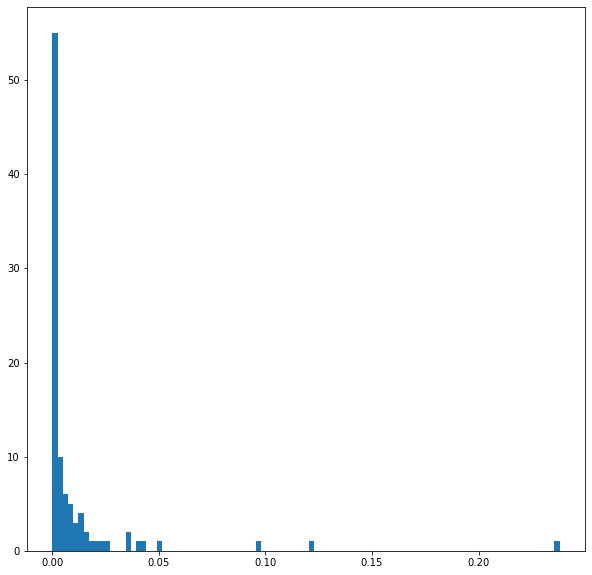

In [13]:
plt.figure(figsize=(10,10))
plt.hist(pca.explained_variance_ratio_,bins=97)
plt.show()

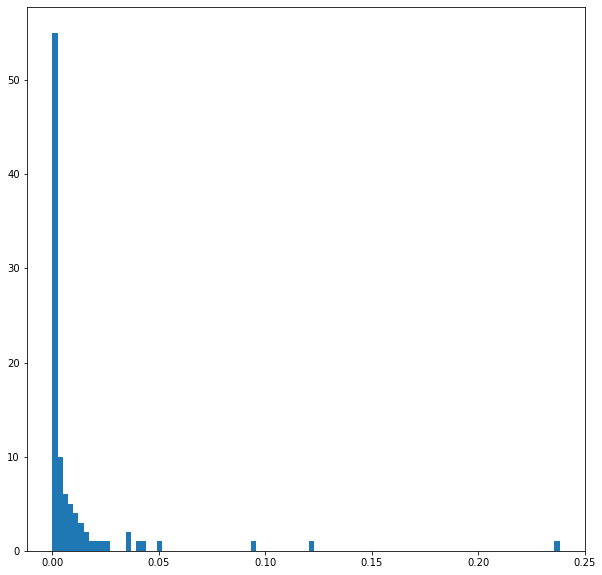

In [14]:
plt.figure(figsize=(10,10))
plt.hist(pca1.explained_variance_ratio_,bins=97)
plt.show()

In [15]:
def getComponents(pca,alpha):
    total_variance=0

    for feature, variance in enumerate(pca.explained_variance_ratio_):
        total_variance+=variance
        if(total_variance>=1-alpha):
            return feature+1
    return len(pca.explained_variance_ratio_)

In [16]:
k = getComponents(pca, 0.05)
m = getComponents(pca1, 0.05)


In [17]:
X=pca.transform(X)[:,0:k]
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.685246,-2.868466,-0.514540,-0.210632,-0.642391,-0.343824,-0.486159,-0.180643,-0.298863,0.847094,...,0.146625,-0.110020,0.069054,-0.207669,0.078716,-0.181485,0.120194,-0.290058,-0.086636,-0.074896
1,0.546130,-2.742743,-0.609027,-1.009279,-1.051196,0.384658,-0.804802,-0.268056,0.025960,-0.196893,...,0.258453,0.044493,-0.112582,0.101707,0.006037,-0.035417,0.000903,-0.069902,0.187455,0.135528
2,0.239419,-2.950370,-0.500093,0.616108,0.353916,-0.393357,0.930801,-0.347510,1.011746,-0.854999,...,0.277540,0.333345,0.229369,-0.390455,-0.099646,0.216032,-0.050870,0.230913,-0.032437,-0.072332
3,0.575248,-2.188885,-0.190137,-0.597025,-0.499899,0.025836,-0.556879,-0.040616,-1.110166,0.522272,...,0.795269,-0.003317,0.193474,-0.013156,0.016689,0.100110,-0.103469,0.131326,0.084812,0.486051
4,-0.694940,2.012351,-0.506086,-1.186513,1.841676,1.064467,-0.296386,1.741574,0.121982,0.679495,...,0.800565,-1.061015,-0.282890,0.409834,0.002107,-0.001833,-0.236366,-0.136363,-0.174556,0.435480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85682,-0.534923,-2.142127,-1.643286,1.147492,0.269011,-0.767740,0.109885,-0.600520,0.939883,-0.221746,...,-0.012934,0.147320,-0.160591,0.178590,0.122885,-0.078010,-0.180173,0.400390,0.083926,0.251133
85683,0.600662,0.854613,0.728355,1.558114,-2.440292,1.661498,-0.888887,-0.606438,-0.211710,-0.644396,...,-0.170922,-0.180793,-0.176249,0.219569,-0.105512,0.034130,-0.159627,0.280120,-0.049492,0.287493
85684,-1.161706,0.685433,0.747312,-0.614494,0.033234,0.433052,-0.952876,1.134982,0.323999,-0.376895,...,0.886313,0.366010,0.038786,0.220943,-0.148511,0.197720,-0.149460,-0.113676,-0.134142,0.024741
85685,0.377122,-2.391369,-0.319486,-1.219715,-1.008568,0.441279,-0.825616,-0.295987,-0.236164,-0.347447,...,0.141293,0.099321,0.144040,-0.062324,0.110184,-0.043257,0.074093,0.048623,0.107299,0.046346


In [18]:
X1=pca1.transform(X1)[:,0:m]
pd.DataFrame(X1)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.285855,-2.415272,-0.278148,-0.526414,-0.724934,-0.075534,-0.661893,-0.164782,-0.826994,0.749122,...,0.378672,0.132834,-0.124106,0.221666,-0.258046,0.119735,-0.251075,0.317674,0.231768,0.118706
1,-1.022273,0.843797,-1.520228,-0.829847,-0.350828,-0.462646,2.313780,0.020230,-0.795243,-0.964457,...,-0.033719,0.492675,0.337577,-0.701135,-0.166630,0.047006,0.110599,0.245343,0.411695,-0.012974
2,3.140239,1.117969,-1.408579,0.269723,0.087885,-0.626056,-1.526916,1.958620,-0.350100,0.408203,...,-1.329358,-0.431254,-0.136613,0.242353,-0.353146,-0.468181,-0.430681,0.170142,0.883760,-0.419011
3,-0.237252,0.363280,2.400172,1.373812,-0.462817,0.190419,1.402715,1.038292,-1.217683,0.547877,...,0.521540,0.163299,-0.210314,-0.174190,-0.009028,0.691933,0.447179,0.014151,0.370044,-0.326142
4,4.170780,2.120963,1.179547,2.205315,0.248975,-1.143951,0.365551,-0.318661,0.141223,1.546417,...,0.108879,-0.099927,-0.301617,0.219579,0.128068,-0.064611,0.154903,-0.053340,0.172495,-0.079620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36718,0.721532,-2.940448,-0.391812,-0.164755,-0.568775,-0.371121,-0.359066,-0.352224,-0.241442,0.811932,...,0.169124,-0.176299,0.159158,-0.118424,0.070090,-0.054587,0.069800,-0.189692,-0.194200,-0.048990
36719,-0.667706,-1.353341,2.173871,-1.977756,1.552470,0.468063,0.331715,0.723478,1.814969,-0.058604,...,0.247240,-0.397220,0.419120,-0.386631,-0.402637,0.082076,-0.333400,-0.459296,-0.220627,-0.192851
36720,2.377742,1.030104,0.461923,-1.095447,0.299416,-0.851279,0.203161,-1.689028,-0.440251,-0.487928,...,0.269323,0.564721,-0.362553,0.245266,-0.330774,-0.056457,-0.208573,0.236003,0.109246,-0.143071
36721,0.419680,-2.563378,-0.492070,-0.386184,-0.743174,-0.158417,-0.583511,-0.127151,-0.685728,0.727898,...,0.373790,0.096551,-0.335257,0.262184,-0.300498,0.113189,-0.276337,0.267435,0.228877,0.060468


In [19]:
X_train=X
X_test=X1
y_train=y

In [20]:
#log_model = LogisticRegression(verbose=True)
#nn_model = MLPClassifier(verbose=True)

#log_model.fit(X_train,y_train)
#nn_model.fit(X_train,y_train)

In [21]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
#cr3 = classification_report(y_test,pred_3)
#print(cr3)

In [24]:
predictions 

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [27]:
submission = dataTest[['id']]
submission

,id
0,0
1,1
2,2
3,3
4,4
...,...
36718,36718
36719,36719
36720,36720
36721,36721


In [28]:
submission['round_winner'] = predictions
submission

C:\Users\MARIAA~1\AppData\Local\Temp/ipykernel_5916/245844295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['round_winner'] = predictions


,id,round_winner
0,0,1
1,1,1
2,2,1
3,3,0
4,4,0
...,...,...
36718,36718,0
36719,36719,0
36720,36720,0
36721,36721,1


In [30]:
submission.to_csv('submission.csv', index = None)